# Crime in Los Angeles 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt 

In [4]:
# Load the data 
crime=pd.read_csv("C://Users//rashi//OneDrive//Desktop//USC//Python//ML_tutorial//crime_LA.csv")

print(crime.head())


   DR Number Date Reported Date Occurred  Time Occurred  Area ID    Area Name  \
0    1208575    03/14/2013    03-11-2013           1800       12  77th Street   
1  102005556    01/25/2010    01/22/2010           2300       20      Olympic   
2        418    03/19/2013    03/18/2013           2030       18    Southeast   
3  101822289    11-11-2010    11-10-2010           1800       18    Southeast   
4   42104479    01-11-2014    01-04-2014           2300       21      Topanga   

   Reporting District  Crime Code                    Crime Code Description  \
0                1241         626         INTIMATE PARTNER - SIMPLE ASSAULT   
1                2071         510                          VEHICLE - STOLEN   
2                1823         510                          VEHICLE - STOLEN   
3                1803         510                          VEHICLE - STOLEN   
4                2133         745  VANDALISM - MISDEAMEANOR ($399 OR UNDER)   

              MO Codes  ...           

In [24]:

crime['Crime Code Description'] = crime['Crime Code Description'].astype('str') 
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   DR Number               1048575 non-null  int64  
 1   Date Reported           1048575 non-null  object 
 2   Date Occurred           1048575 non-null  object 
 3   Time Occurred           1048575 non-null  int64  
 4   Area ID                 1048575 non-null  int64  
 5   Area Name               1048575 non-null  object 
 6   Reporting District      1048575 non-null  int64  
 7   Crime Code              1048575 non-null  int64  
 8   Crime Code Description  1048575 non-null  object 
 9   MO Codes                935489 non-null   object 
 10  Victim Age              957829 non-null   float64
 11  Victim Sex              955344 non-null   object 
 12  Victim Descent          955322 non-null   object 
 13  Premise Code            1048520 non-null  float64
 14  Pr

['77th Street' 'Central' 'Devonshire' 'Foothill' 'Harbor' 'Hollenbeck'
 'Hollywood' 'Mission' 'N Hollywood' 'Newton' 'Northeast' 'Olympic'
 'Pacific' 'Rampart' 'Southeast' 'Southwest' 'Topanga' 'Van Nuys'
 'West LA' 'West Valley' 'Wilshire']


Text(0.5, 1.0, 'Location of Crime in LA')

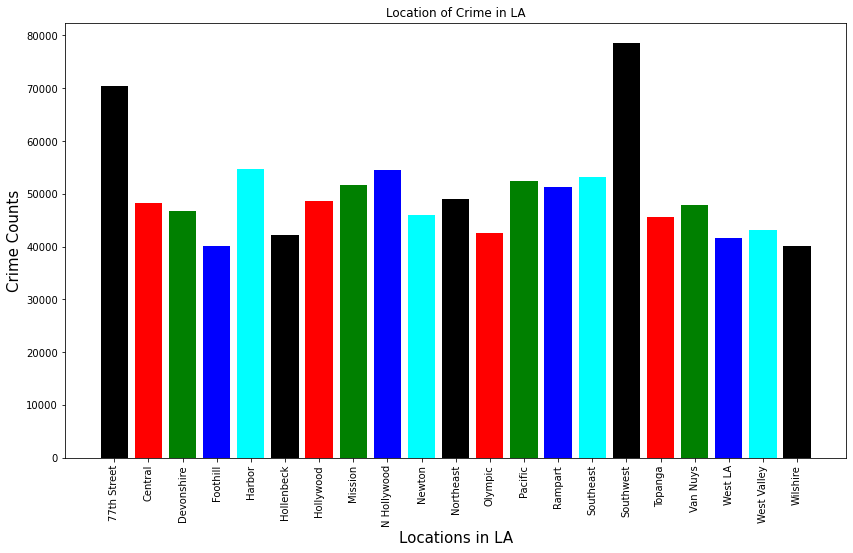

In [17]:
# Regions of Crime Occurence 
area=np.unique(crime['Area Name'])
print(area)

count=[]
for i in range(len(area)):
    c=len(crime['Area ID'][crime['Area Name']==area[i]])
    count.append(c)

# bar
plt.figure(figsize=(14,8))
plt.bar(area,count,color=['black', 'red', 'green', 'blue', 'cyan'])
plt.xticks(rotation='vertical')
plt.ylabel('Crime Counts',fontsize=15);plt.xlabel('Locations in LA',fontsize=15);plt.title('Location of Crime in LA')

BATTERY - SIMPLE ASSAULT                                        102912
BURGLARY FROM VEHICLE                                            81408
VEHICLE - STOLEN                                                 78461
BURGLARY                                                         78378
THEFT PLAIN - PETTY ($950 & UNDER)                               77866
THEFT OF IDENTITY                                                68422
INTIMATE PARTNER - SIMPLE ASSAULT                                55433
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                         50489
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114     49333
ROBBERY                                                          42489
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT                   42239
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD0036     40360
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)                  38517
CRIMINAL THREATS - NO WEAPON DISPLAYED                           32059
SHOPLI

Text(0.5, 1.0, 'CrimeTypes in LA')

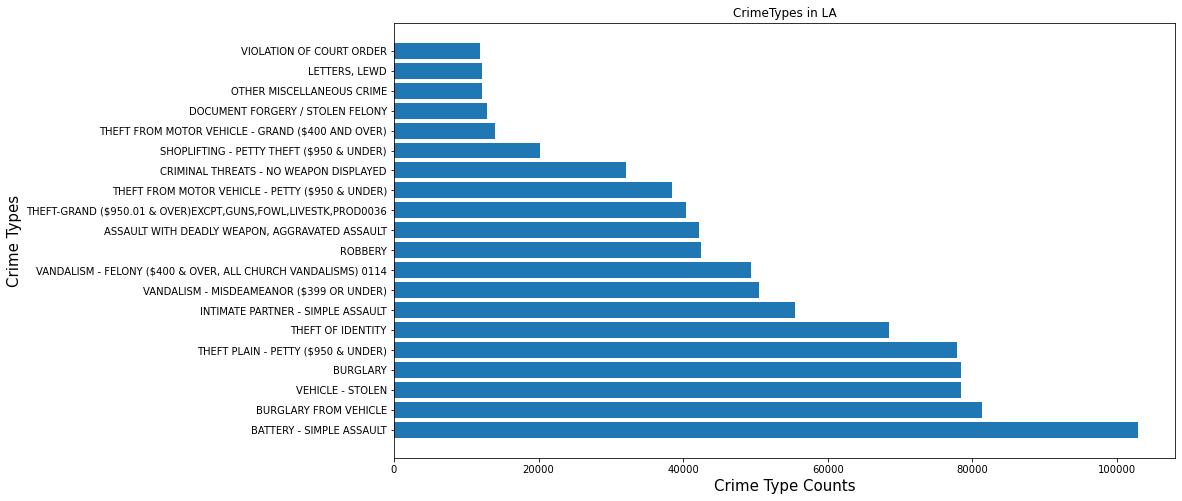

In [41]:
# Top 20 Crime Types in LA

major_crimes=crime["Crime Code Description"].value_counts().head(20)
print(major_crimes)

# bar
plt.figure(figsize=(14,8))

plt.barh(crime['Crime Code Description'].value_counts().index[0:20],crime["Crime Code Description"].value_counts().head(20),align='center')

plt.xlabel('Crime Type Counts',fontsize=15);plt.ylabel('Crime Types',fontsize=15);plt.title('CrimeTypes in LA')

H    369687
W    261678
B    174998
O     98985
A     23773
X     18734
K      4726
F      1337
I       445
C       360
J       175
P       168
U        87
V        59
Z        39
G        34
S        17
D        12
L         7
-         1
Name: Victim Descent, dtype: int64


Text(0.5, 1.0, 'Crime Victimization')

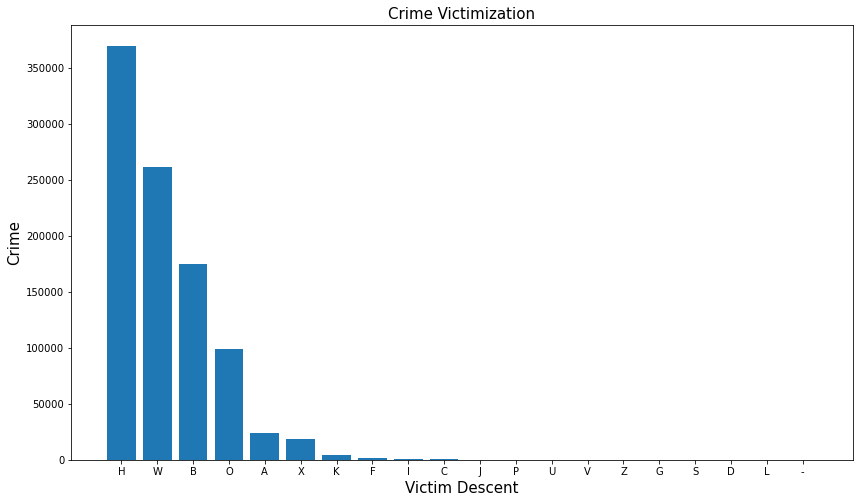

In [54]:
# Victim Descent

des=crime['Victim Descent'].value_counts()
print(des)

plt.figure(figsize=(14,8))
plt.bar(crime['Victim Descent'].value_counts().index[0:20],crime['Victim Descent'].value_counts().head(20),align='center')

plt.xlabel('Victim Descent',fontsize=15);plt.ylabel('Crime',fontsize=15);plt.title('Crime Victimization',fontsize=15)

Text(0.5, 1.0, 'Target Communities')

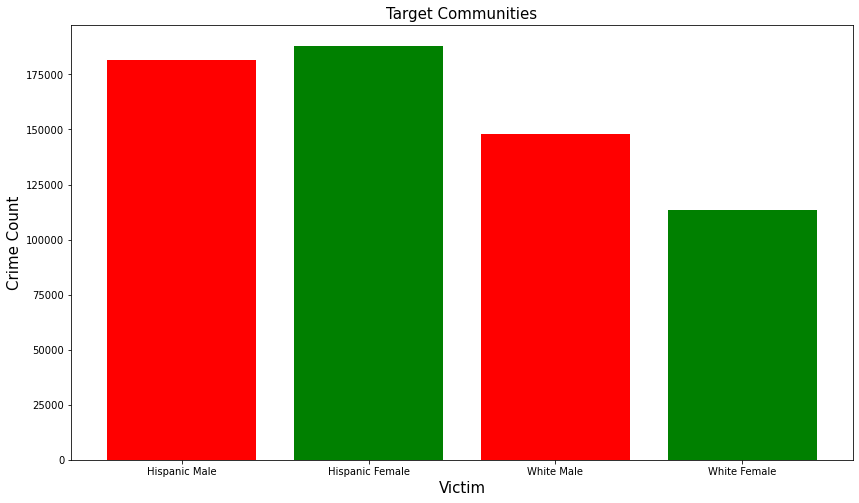

In [97]:
# Observation: Hispansic and white people are largest pool of victims 

m_h=len(crime[(crime['Victim Descent']=='H') & (crime['Victim Sex']=='M')])
f_h=len(crime[(crime['Victim Descent']=='H') & (crime['Victim Sex']=='F')])

m_w=len(crime[(crime['Victim Descent']=='W') & (crime['Victim Sex']=='M')])
f_w=len(crime[(crime['Victim Descent']=='W') & (crime['Victim Sex']=='F')])

plt.figure(figsize=(14,8))

plt.bar(['Hispanic Male','Hispanic Female', 'White Male','White Female'],[m_h,f_h,m_w,f_w],color=['red','green','red','green'])
plt.xlabel('Victim',fontsize=15);plt.ylabel('Crime Count',fontsize=15);plt.title('Target Communities',fontsize=15)

count    957829.000000
mean         35.745105
std          16.806215
min          10.000000
25%          23.000000
50%          34.000000
75%          47.000000
max          99.000000
Name: Victim Age, dtype: float64


Text(0.5, 1.0, 'Age')

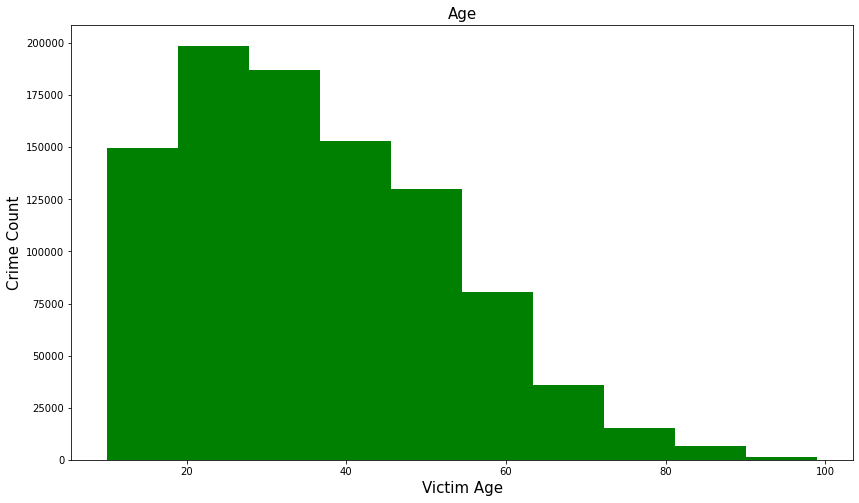

In [68]:
# Victim Age
plt.figure(figsize=(14,8))
print(crime['Victim Age'].describe())

plt.hist(crime['Victim Age'],color='green')



C:\Users\rashi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Crime Probability:Age')

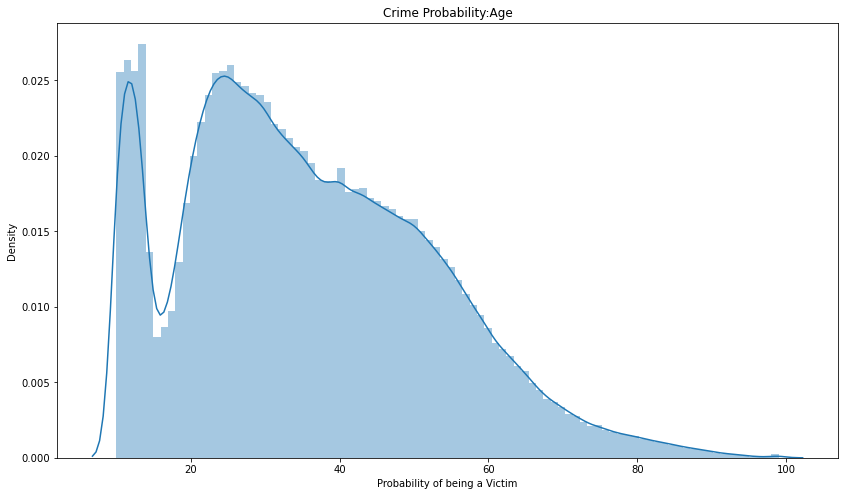

In [72]:
# dist plot
plt.figure(figsize=(14,8))

sn.distplot(crime["Victim Age"].dropna(), bins=90)

plt.xlabel('Probability of being a Victim')
plt.title('Crime Probability:Age')

STREET                                          230448
SINGLE FAMILY DWELLING                          224972
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)    141247
PARKING LOT                                      72449
SIDEWALK                                         54072
                                                 ...  
TRAM/STREETCAR(BOXLIKE WAG ON RAILS)*                2
RETIRED (DUPLICATE) DO NOT USE THIS CODE             2
GREEN LINE (I-105 FWY LEVEL TRAIN)                   1
REDLINE SUBWAY TUNNEL                                1
TACTICAL SIGNIFICANCE                                1
Name: Premise Description, Length: 207, dtype: int64


Text(0.5, 1.0, 'Crime Distribution:Premise Type')

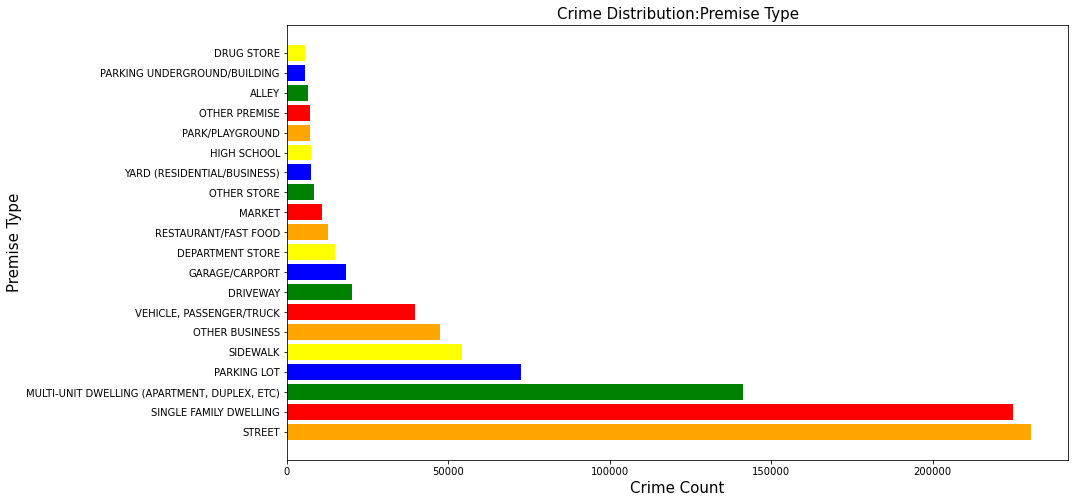

In [73]:
# premise type


# Top 20 premises for crime
premise=crime['Premise Description'].value_counts()
print(premise)

# plot top 20 premise 
plt.figure(figsize=(14,8))

plt.barh(crime['Premise Description'].value_counts().index[0:20],crime['Premise Description'].value_counts().head(20),color=['orange', 'red', 'green', 'blue', 'yellow'])

plt.xlabel('Crime Count',fontsize=15);plt.ylabel('Premise Type',fontsize=15);plt.title('Crime Distribution:Premise Type',fontsize=15)

STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    215793
VERBAL THREAT                                      30525
UNKNOWN WEAPON/OTHER WEAPON                        25507
HAND GUN                                           16355
SEMI-AUTOMATIC PISTOL                               6694
KNIFE WITH BLADE 6INCHES OR LESS                    5857
OTHER KNIFE                                         4557
UNKNOWN FIREARM                                     4042
VEHICLE                                             3387
REVOLVER                                            3232
BOTTLE                                              2596
BLUNT INSTRUMENT                                    2330
ROCK/THROWN OBJECT                                  2099
CLUB/BAT                                            1998
SIMULATED GUN                                       1956
STICK                                               1940
KITCHEN KNIFE                                       1815
FOLDING KNIFE                  

Text(0.5, 1.0, 'Crime Distribution:Weapon Type')

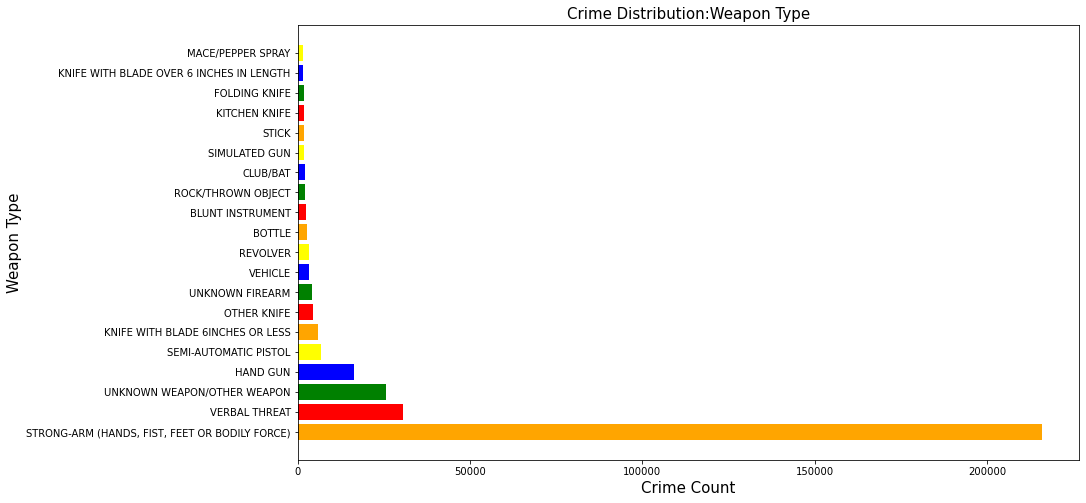

In [8]:
# Weapon Type

# to know no of missing values 

missvals = crime["Weapon Description"].isnull().sum()

weapon=crime['Weapon Description'].value_counts().head(20)
print(weapon)

# plot top 20 premise 
plt.figure(figsize=(14,8))

plt.barh(crime['Weapon Description'].value_counts().index[0:20],crime['Weapon Description'].value_counts().head(20),color=['orange', 'red', 'green', 'blue', 'yellow'])
plt.xlabel('Crime Count',fontsize=15);plt.ylabel('Weapon Type',fontsize=15);plt.title('Crime Distribution:Weapon Type',fontsize=15)

# Time and Date based study of Crime In LA